<a href="https://colab.research.google.com/github/UjjwalRana12/ranking-grad/blob/main/Rank_Tensor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [557]:
import math

In [558]:
class Rank:

  def __init__(self, data, _children=(), _op='', label=''):
    self.data = data
    self.grad = 0.0
    self._backward = lambda: None
    self._children = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self):
    return f"Rank(data={self.data})"

  def __add__(self, other):
    other = other if isinstance(other, Rank) else Rank(other)
    out = Rank(self.data + other.data, (self, other), '+')

    def _backward():
      self.grad += 1.0 * out.grad
      other.grad += 1.0 * out.grad
    out._backward = _backward

    return out

  def __mul__(self, other):
    other = other if isinstance(other, Rank) else Rank(other)
    out = Rank(self.data * other.data, (self, other), '*')

    def _backward():
      self.grad += other.data * out.grad
      other.grad += self.data * out.grad
    out._backward = _backward

    return out

  def __pow__(self, other):
    assert isinstance(other, (int, float)), " int and float powers only"
    out = Rank(self.data**other, (self,), f'**{other}')

    def _backward():
        self.grad += other * (self.data ** (other - 1)) * out.grad
    out._backward = _backward

    return out

  def __rmul__(self, other):
    return self * other

  def __truediv__(self, other):
    return self * other**-1

  def __neg__(self):
    return self * -1

  def __sub__(self, other):
    return self + (-other)

  def __radd__(self, other):
    return self + other

  def tanh(self):
    x = self.data
    t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
    out = Rank(t, (self, ), 'tanh')

    def _backward():
      self.grad += (1 - t**2) * out.grad
    out._backward = _backward

    return out

  def exp(self):
    x = self.data
    out = Rank(math.exp(x), (self, ), 'exp')

    def _backward():
      self.grad += out.data * out.grad
    out._backward = _backward

    return out


  def backward(self):

    topo = []
    visited = set()
    def build_topo(v):
      if v not in visited:
        visited.add(v)
        for child in v._children:
          build_topo(child)
        topo.append(v)
    build_topo(self)

    self.grad = 1.0
    for node in reversed(topo):
      node._backward()

In [559]:
# a=Rank(2)
# a

In [560]:
# b=Rank(2)
# b

In [561]:
# a.__add__(b)

In [562]:
# print(a+b)

In [563]:
# c=a+b

In [564]:
# c._children

In [565]:
# rank1 = Rank(10)
# rank2 = Rank(5)

# c = rank1 + rank2
# print(c)
# print(c._children)

In [566]:
# c._op

In [567]:
a=Rank(2,label='a')
b=Rank(3,label='b')

c=Rank(4,label='c')

In [568]:
e=a+b

In [569]:
d=e+c
d.label='d'
e.label='e'

In [570]:
d

Rank(data=9)

In [571]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._children:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{  data %.4f }" % ( n.data), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

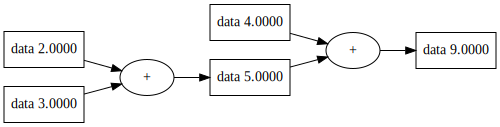

In [572]:
draw_dot(d)

In [573]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._children:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{  %s |data %.4f  }" % (n.label, n.data), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

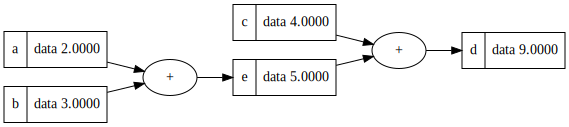

In [574]:
draw_dot(d)

In [575]:
f=Rank(-2,label='f')
L=d*f
L.label='L'

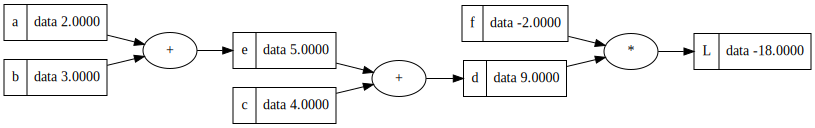

In [576]:
draw_dot(L)

In [577]:
# this is the output of the forward propagation for L=d*f where d=a*b+c

NOW BACKWARD PROPAGATION

In [578]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._children:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

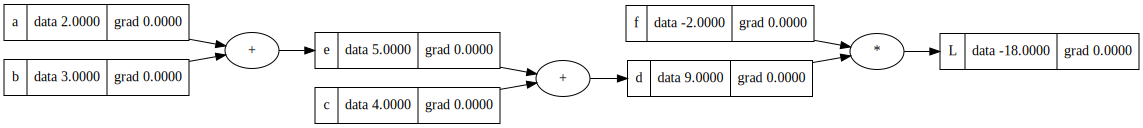

In [579]:
draw_dot(L)

In [580]:
L.grad=1

In [581]:
f

Rank(data=-2)

In [582]:
# L=d*f
# so we calculate dL/dd
# which is f
d.grad=-2
f.grad=10

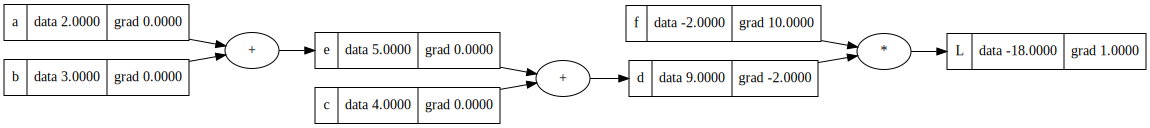

In [583]:
draw_dot(L)

# basically we are calculating every backpropagation manually


In [584]:
def manualBackPropagation():
  h=0.001
  a=Rank(2,label='a')
  b=Rank(3,label='b')
  c=Rank(4,label='c')
  f=Rank(-2,label='f')
  e=a+b
  d=e+c
  L=d*f
  L.label='L'
  L1=L.data

  a=Rank(2,label='a')
  b=Rank(3,label='b')
  c=Rank(4,label='c')
  f=Rank(-2,label='f')
  a.data+=h
  e=a+b

  d=e+c

  L=d*f



  L.label='L'
  L2=L.data

  print((L2-L1)/h)



manualBackPropagation()


-1.9999999999988916


In [585]:
c.grad=-2



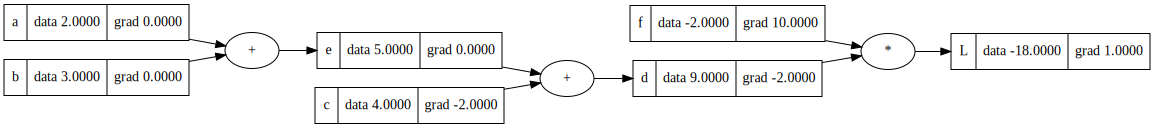

In [586]:
draw_dot(L)

In [587]:
e.grad=-2
a.grad=-2
b.grad=-2

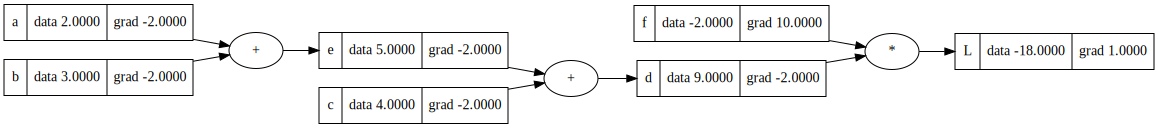

In [588]:
draw_dot(L)

# after calculating the grad we can nudge the changeable nodes





In [589]:
a.data+=0.01*a.grad
b.data+=0.01*b.grad
c.data+=0.01*c.grad
f.data+=0.01*f.grad
e=a+b
d=e+c
L=d*f

print(L)




Rank(data=-16.985999999999997)


In [590]:
#the value of  l is changed

# making whole neural network using tanh as activation function

---



In [591]:
# inputs x1,x2
x1 = Rank(2.0, label='x1')
x2 = Rank(0.0, label='x2')
# weights w1,w2
w1 = Rank(-3.0, label='w1')
w2 = Rank(1.0, label='w2')
# bias of the neuron
b = Rank(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh()
o.label='o'


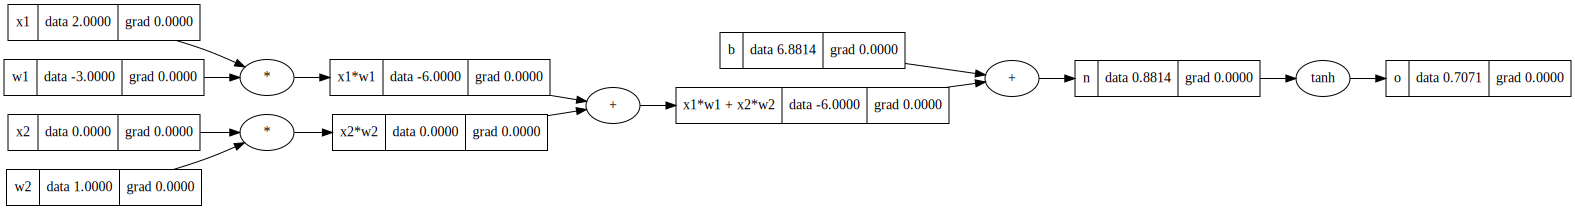

In [592]:
draw_dot(o)

In [593]:
o.grad=1

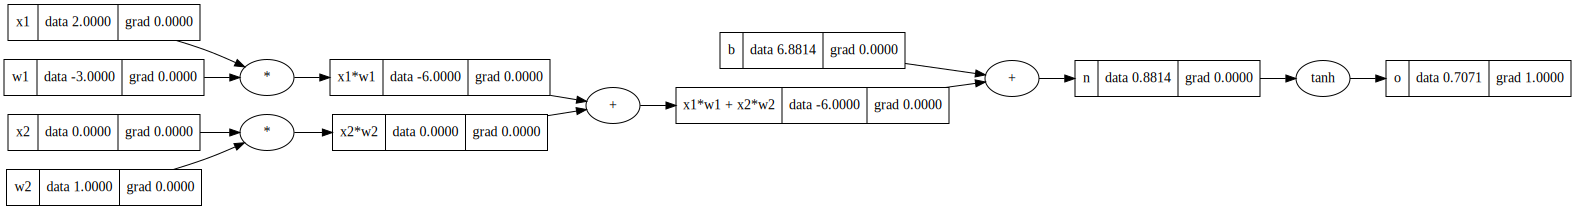

In [594]:
draw_dot(o)

In [595]:
# d(tanh)/dx= 1 - tanh**2

In [596]:
# o = tanh(n)
# do/dn = 1 - o**2

In [597]:
n.grad=0.5

In [598]:
x1w1x2w2.grad=0.5
x1w1.grad=0.5
x2w2.grad=0.5
b.grad=0.5


In [599]:
x2.grad=w2.data * x2w2.grad
w2.grad= x2.data *x2w2.grad

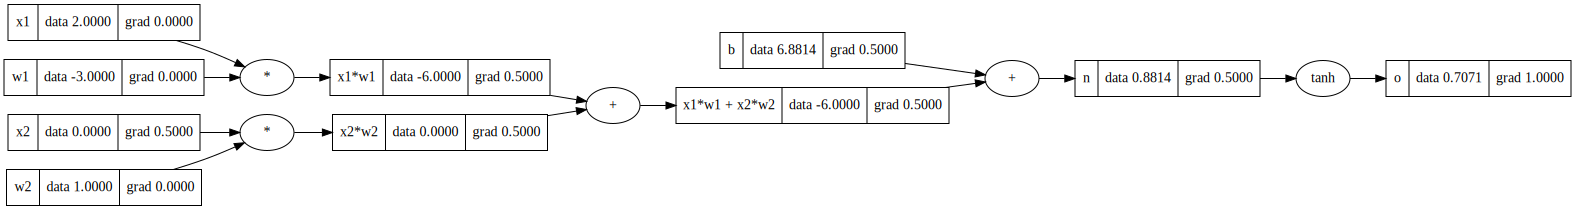

In [600]:
draw_dot(o)

In [601]:
x1.grad=w1.data * x1w1.grad
w1.grad= x1.data * x1w1.grad

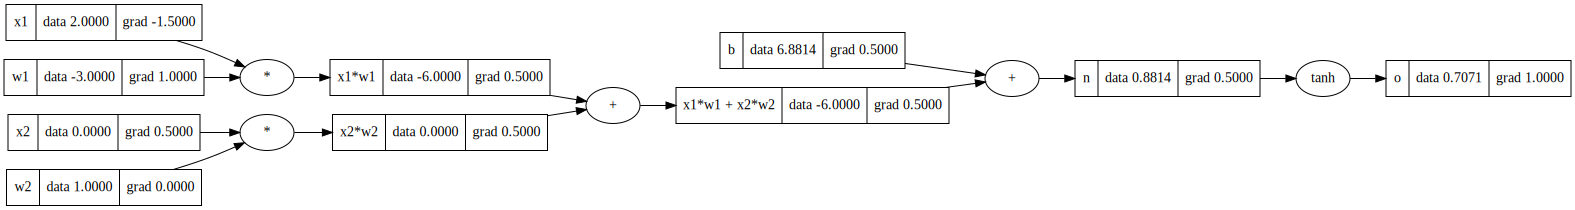

In [602]:
draw_dot(o)

# redefining expression so it can be calculated using backward func

In [603]:
# inputs x1,x2
x1 = Rank(2.0, label='x1')
x2 = Rank(0.0, label='x2')
# weights w1,w2
w1 = Rank(-3.0, label='w1')
w2 = Rank(1.0, label='w2')
# bias of the neuron
b = Rank(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh()
o.label='o'


In [604]:
o.grad=1
o._backward()

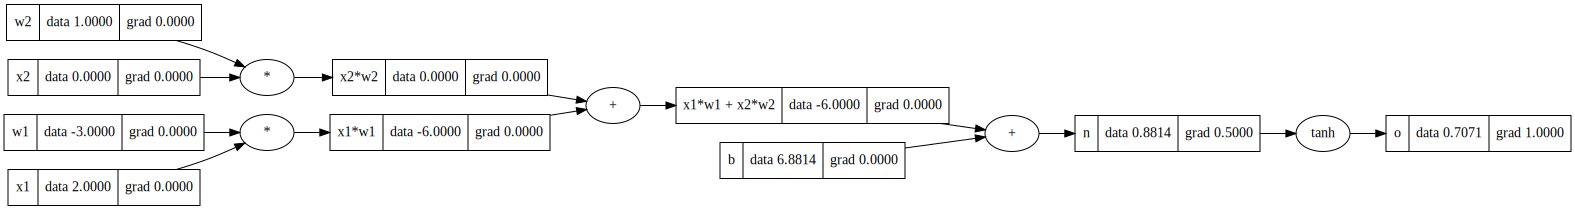

In [605]:
draw_dot(o)

In [606]:
n._backward()

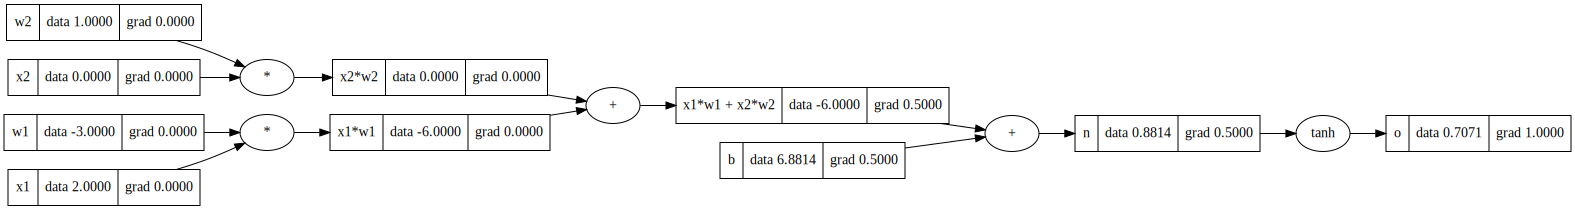

In [607]:
draw_dot(o)

In [608]:
b._backward()

In [609]:
x1w1x2w2._backward()
x1w1._backward()
b._backward()

#using backward function

In [610]:
# inputs x1,x2
x1 = Rank(2.0, label='x1')
x2 = Rank(0.0, label='x2')
# weights w1,w2
w1 = Rank(-3.0, label='w1')
w2 = Rank(1.0, label='w2')
# bias of the neuron
b = Rank(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh()
o.label='o'


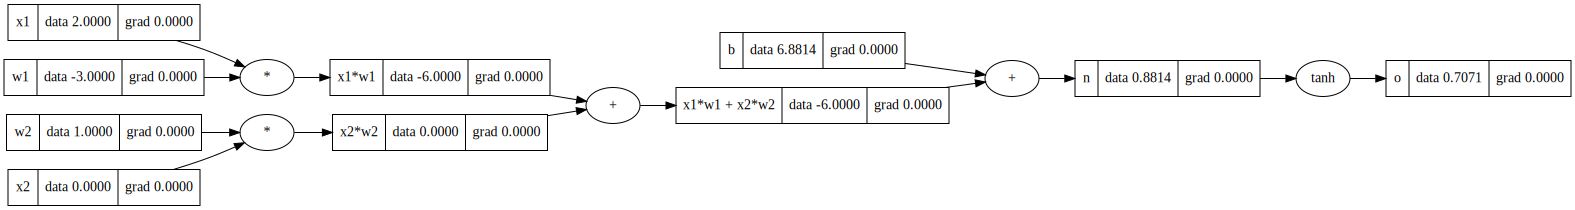

In [611]:
draw_dot(o)

In [612]:
o.backward()

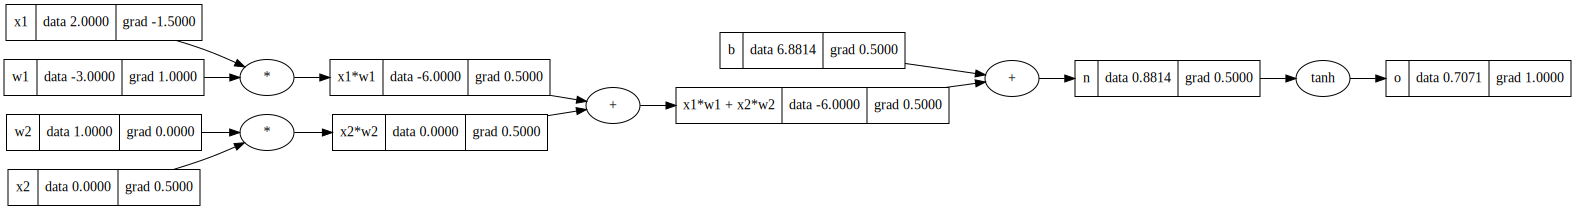

In [613]:
draw_dot(o)

# verified using backward function


In [616]:
import torch

In [618]:
x1 = torch.Tensor([2.0]).double()                ; x1.requires_grad = True
x2 = torch.Tensor([0.0]).double()                ; x2.requires_grad = True
w1 = torch.Tensor([-3.0]).double()               ; w1.requires_grad = True
w2 = torch.Tensor([1.0]).double()                ; w2.requires_grad = True
b = torch.Tensor([6.8813735870195432]).double()  ; b.requires_grad = True
n = x1*w1 + x2*w2 + b
o = torch.tanh(n)

print(o.data.item())
o.backward()
print('x2', x2.grad.item())
print('w2', w2.grad.item())
print('x1', x1.grad.item())
print('w1', w1.grad.item())

0.7071066904050358
x2 0.5000001283844369
w2 0.0
x1 -1.5000003851533106
w1 1.0000002567688737
